In [12]:
import cv2
import matplotlib.pyplot as plt
import time 
%matplotlib inline

In [13]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [17]:
#DEALING WITH FALSE POSITIVES: 
#A simple tweak to the scale factor compensates for this so can move that parameter around.
#minimum scaleFactor = 1.1

def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    img_copy = colored_img.copy()          
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          

    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              

    return img_copy

In [18]:
#load cascade classifier training file 
haar_face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
haar_face_cascade_tree = cv2.CascadeClassifier("haarcascade_frontalface_alt_tree.xml")
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')  

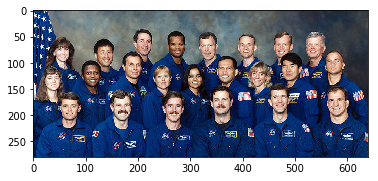

In [19]:
test = cv2.imread('test01.jpg')  
faces_detected_img = detect_faces(haar_face_cascade, test)  
plt.imshow(convertToRGB(faces_detected_img))

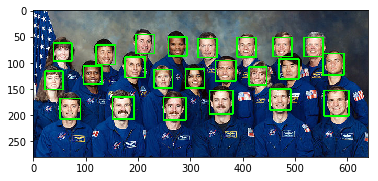

In [6]:
faces_detected_img = detect_faces(haar_face_cascade_tree, test)  
plt.imshow(convertToRGB(faces_detected_img))

In [ ]:
faces_detected_img = detect_faces(lbp_face_cascade, test)  
plt.imshow(convertToRGB(faces_detected_img))

In [7]:
video_capture = cv2.VideoCapture(0)
video_capture.set(3, 640) #WIDTH
video_capture.set(4, 480) #HEIGHT
while True:
    ret, frame = video_capture.read()
    faces_detected_img = detect_faces(haar_face_cascade, frame)  
    cv2.imshow('Video', (faces_detected_img))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

#release the capture
video_capture.release()
cv2.destroyAllWindows()